# Full Pipeline Visualization Notebook
This notebook visualizes the ENHANCEMENT stage in detail, then continues the FULL pipeline (thresholding and edges).

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

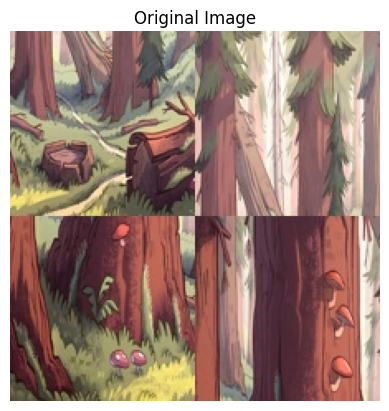

In [1]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

IMAGE_PATH = "data/raw/Gravity Falls/puzzle_2x2/3.jpg"   # 👈 CHANGE THIS
original = cv2.imread(IMAGE_PATH)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')


In [2]:

from src.enhancement import to_grayscale, denoise_bilateral, apply_clahe, sharpen
from src.thresholding import threshold_otsu, threshold_adaptive
from src.edge_detection import canny_edges, binary_edges


## Enhancement Stage (Step by Step)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

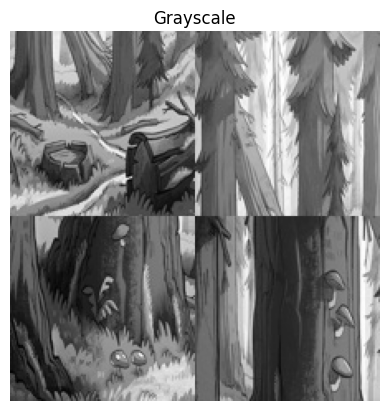

In [3]:

gray = to_grayscale(original)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

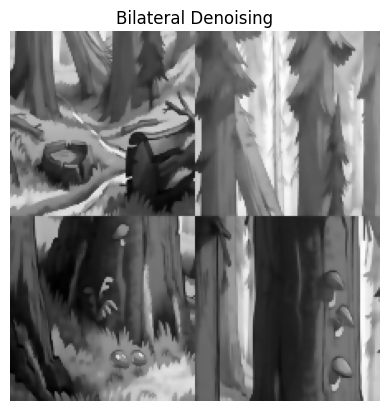

In [4]:

bilateral = denoise_bilateral(gray)
plt.imshow(bilateral, cmap='gray')
plt.title("Bilateral Denoising")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

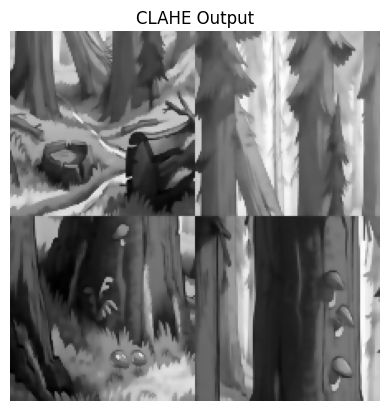

In [5]:

clahe = apply_clahe(bilateral)
plt.imshow(clahe, cmap='gray')
plt.title("CLAHE Output")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

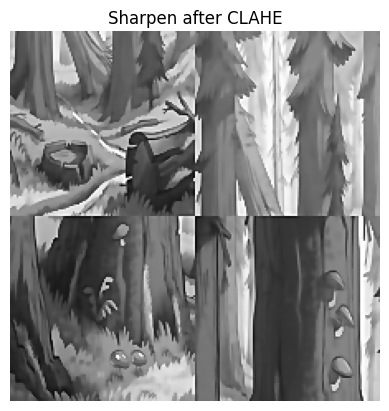

In [6]:

sharp_clahe = sharpen(clahe)
plt.imshow(sharp_clahe, cmap='gray')
plt.title("Sharpen after CLAHE")
plt.axis('off')


## Thresholding Stage

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

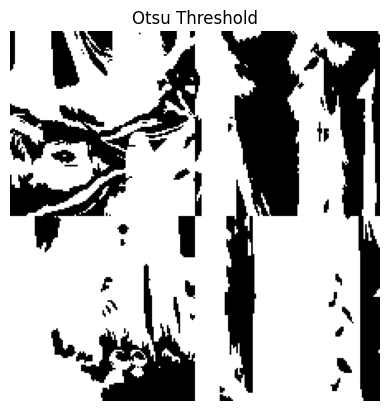

In [7]:

otsu = threshold_otsu(clahe)
plt.imshow(otsu, cmap='gray')
plt.title("Otsu Threshold")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

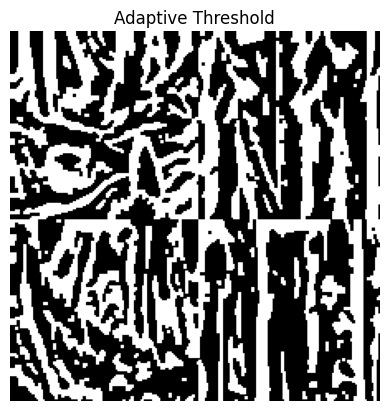

In [8]:

adaptive = threshold_adaptive(clahe)
plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')


## Edge Detection Stage

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

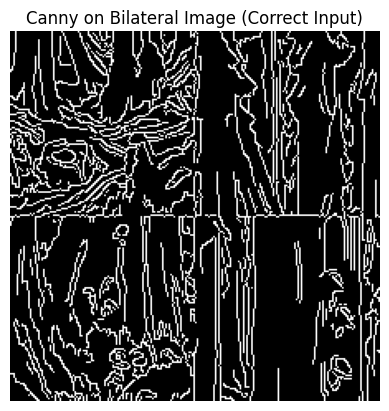

In [9]:

canny = canny_edges(bilateral)  # Canny takes DENOISED GRAYSCALE
plt.imshow(canny, cmap='gray')
plt.title("Canny on Bilateral Image (Correct Input)")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

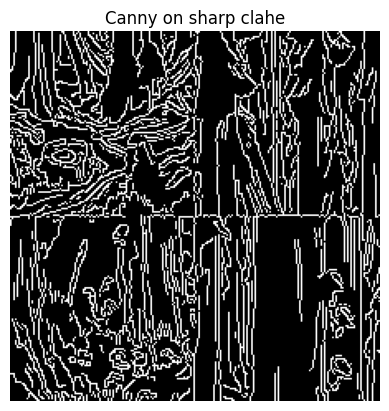

In [10]:

canny = canny_edges(sharp_clahe)  # Canny takes DENOISED GRAYSCALE
plt.imshow(canny, cmap='gray')
plt.title("Canny on sharp clahe")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

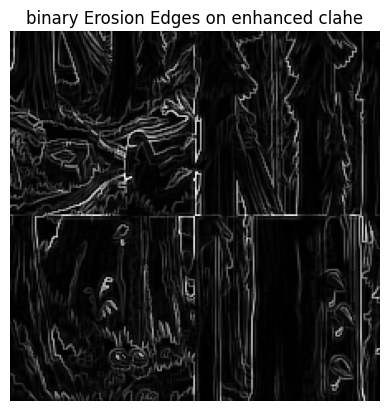

In [11]:
from src.edge_detection import laplacian_edges


binary_edge = binary_edges(sharp_clahe)
plt.imshow(binary_edge, cmap='gray')
plt.title("binary Erosion Edges on enhanced clahe")
plt.axis('off')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

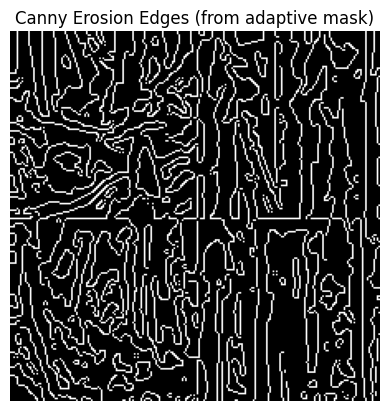

In [12]:
binary_edge = canny_edges(adaptive)
plt.imshow(binary_edge, cmap='gray')
plt.title("Canny Erosion Edges (from adaptive mask)")
plt.axis('off')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

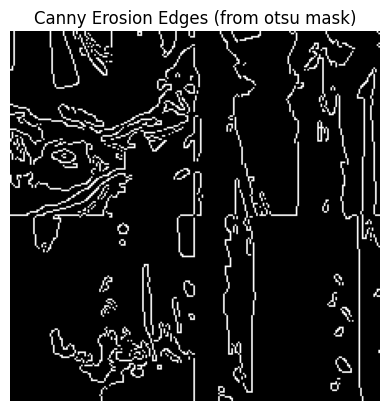

In [13]:
binary_edge = canny_edges(otsu)
plt.imshow(binary_edge, cmap='gray')
plt.title("Canny Erosion Edges (from otsu mask)")
plt.axis('off')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

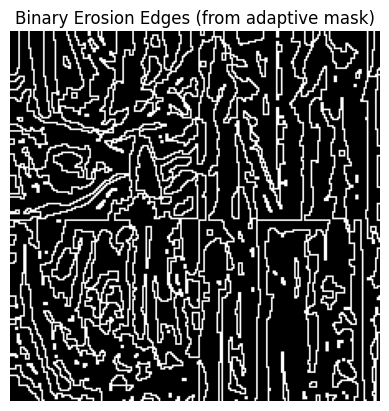

In [14]:

binary_edge = binary_edges(adaptive)
plt.imshow(binary_edge, cmap='gray')
plt.title("Binary Erosion Edges (from adaptive mask)")
plt.axis('off')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

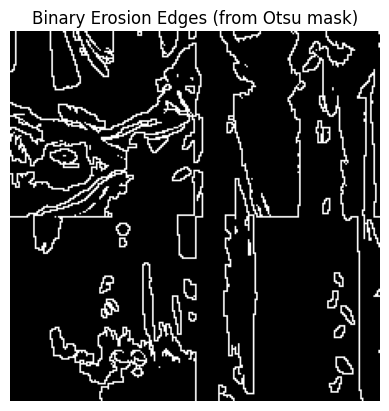

In [15]:

binary_edge = binary_edges(otsu)
plt.imshow(binary_edge, cmap='gray')
plt.title("Binary Erosion Edges (from Otsu mask)")
plt.axis('off')


## Full Pipeline Overview

In [16]:

plt.figure(figsize=(16,10))

titles = ["Original","Grayscale","Bilateral","CLAHE","Sharpen","Sharpen+CLAHE","Otsu","Adaptive","Canny","BinaryEdges"]
images = [original, gray, bilateral, clahe, sharp_no_clahe, sharp_clahe, otsu, adaptive, canny, binary_edge]

for i,(img,title) in enumerate(zip(images,titles)):
    plt.subplot(3,4,i+1)
    if len(img.shape)==2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.suptitle("FULL PIPELINE VISUALIZATION", fontsize=18)
plt.show()


NameError: name 'sharp_no_clahe' is not defined

<Figure size 1600x1000 with 0 Axes>